All reactions

In [71]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [72]:

power_list = [50, 100, 200, 400, 600, 800, 1e3, 1.2e3, 1.4e3, 1.6e3]
#efficiency_list = [0.78, 0.72, 0.68, 0.6, 0.5, 0.48, 0.45, 0.41, 0.37, 0.35]
efficiency_list = [0.79, 0.75, 0.67, 0.58, 0.53, 0.46, 0.42, 0.4, 0.37, 0.35]
Le=[]
LXe=[]
LXe_ion=[]
LTe=[]
LTXe=[]
L_thrust_ion =[]
L_thrust_neutral = []
L_thrust_total = []
tracked_variables = {}
for i in range(len(power_list)):
    log_file_path = '../logs/all_reactions'+str(i)+'.json'
    print(log_file_path)
    with open(log_file_path, 'r') as file:
        tracked_variables = json.load(file)
    Le.append(tracked_variables["e_density"][-1])
    LXe.append(tracked_variables["Xe_density"][-1])
    LXe_ion.append(tracked_variables["Xe+_density"][-1])
    LTe.append(tracked_variables['temperature_0_atom'][-1])
    LTXe.append(tracked_variables['temperature_1_atom'][-1])
    L_thrust_ion.append(tracked_variables['total_ion_thrust'][-1])
    L_thrust_neutral.append(tracked_variables['total_neutral_thrust'][-1])
    L_thrust_total.append(tracked_variables['total_thrust'][-1])


../logs/all_reactions0.json
../logs/all_reactions1.json
../logs/all_reactions2.json
../logs/all_reactions3.json
../logs/all_reactions4.json
../logs/all_reactions5.json
../logs/all_reactions6.json
../logs/all_reactions7.json
../logs/all_reactions8.json
../logs/all_reactions9.json


In [73]:
print(LXe)
print(len(Le))

[5.4724721157523866e+19, 5.075471713076346e+19, 4.4942567920047e+19, 3.677585310696864e+19, 3.0588892610767053e+19, 2.7266669700308062e+19, 2.39638242305825e+19, 2.0298381695556567e+19, 1.8042438962825925e+19, 1.5606071004248304e+19]
10


C:\Users\verdi\AppData\Local\Temp\ipykernel_20876\627503365.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


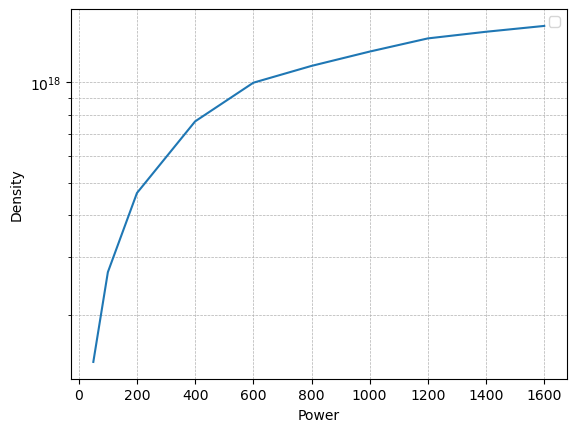

In [74]:
from matplotlib.ticker import LogLocator

x=power_list
y=Le

fig, ax = plt.subplots()
ax.plot(x,y)

ax.set_yscale('log')

ax.yaxis.set_major_locator(LogLocator(base=10.0, subs=(1.0, ), numticks=10))
ax.yaxis.set_minor_locator(LogLocator(base=10.0, subs=np.arange(2, 10)*0.1, numticks=100))

ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# plt.plot(x, y, label="electron density")
# plt.grid()
# plt.yscale('log')
plt.xlabel("Power")
plt.ylabel("Density")
plt.legend()

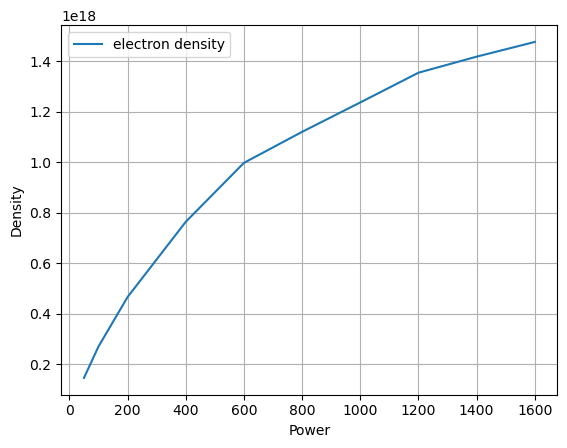

In [75]:
plt.plot(x, y, label="electron density")
plt.grid()
plt.xlabel("Power")
plt.ylabel("Density")
plt.legend()

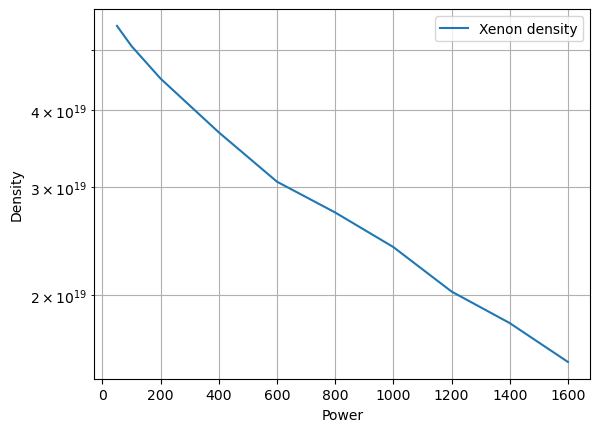

In [76]:
plt.plot(x, LXe, label="Xenon density")
plt.grid(True, which='both')
plt.yscale('log')
plt.xlabel("Power")
plt.ylabel("Density")
plt.legend()

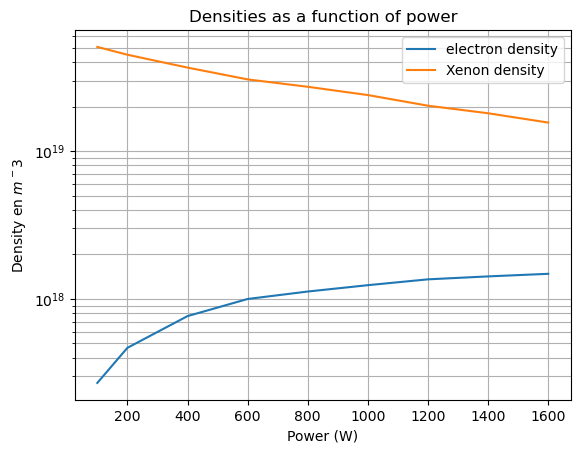

In [91]:
plt.plot(x[1:], y[1:], label="electron density")
plt.plot(x[1:], LXe[1:], label="Xenon density")
plt.grid(True, which='both')
plt.yscale('log')
plt.xlabel("Power (W)")
plt.ylabel(f"Density en $m^{-3}$")
plt.title("Densities as a function of power")
plt.legend()

In [89]:
from scipy.constants import k, e, pi
import matplotlib.pyplot as plt

def plot_variables(var_list1, var_list2):
    """
    Plots the evolution of variables from tracked_variables with 'time' on the x-axis.
    The first list of variables is plotted on the primary y-axis, and the second list on a secondary y-axis.

    Parameters:
    var_list1 (list): List of variable names to plot on the primary y-axis.
    var_list2 (list): List of variable names to plot on the secondary y-axis.
    """
    
    fig, ax1 = plt.subplots()

    # Plot variables from var_list1 on the primary y-axis
    ax1.plot(power_list, var_list1, label="electron temperature")
    ax1.set_xlabel('Power (W)')
    ax1.set_ylabel('Electron temperature (eV)')
    ax1.grid()

    # #Vérification du temps de relaxation:
    # tau=7.9e-3
    # T_init=3
    # L=[tangente(t,T_init,tau) for t in time]

    # Create a secondary y-axis
    L=[v*e/k for v in var_list2]
    ax2 = ax1.twinx()
    ax2.plot(power_list, L, 'g', label="Xenon temperature")
    # ax2.plot(L,label="tangente à l'orgine")
    ax2.set_ylabel('Xenon Temperature (K)')

    ax2.legend(loc='best')

    # x_vert=7.9e-3
    # plt.axvline(x_vert, color='r', linestyle='--')

    lines_2, labels_2 = ax2.get_legend_handles_labels()
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    ax2.legend(lines_2 + lines_1, labels_2 + labels_1, loc='best')

    plt.title('Temperatures as a function of power')
    plt.show()

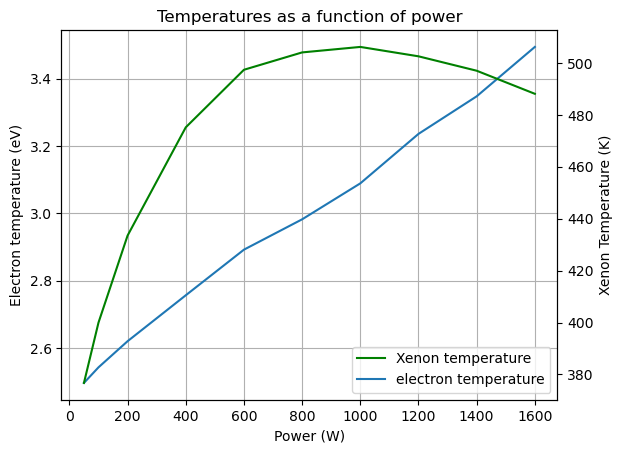

In [90]:
plot_variables(LTe,LTXe)

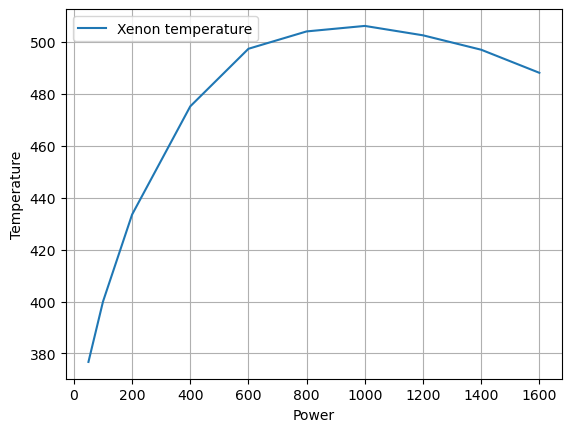

In [80]:
#plt.plot(power_list,LTe, label="electron temperature")
L=[v*e/k for v in LTXe]
plt.plot(power_list,L, label="Xenon temperature")
plt.grid()
plt.xlabel("Power")
plt.ylabel("Temperature")
plt.legend()

3.4938284155099164


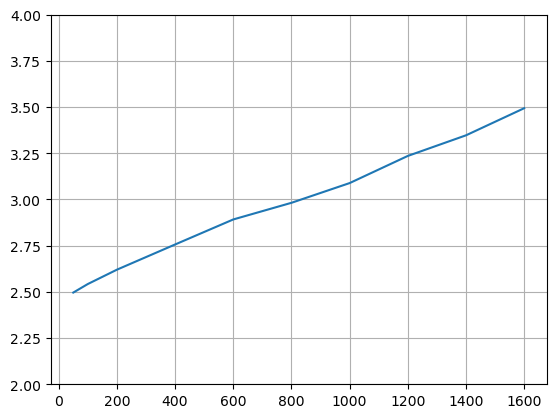

In [81]:
plt.plot(power_list, LTe)
plt.grid()
plt.ylim(2, 4)
print(LTe[-1])

- Max des Températures du Xénon: 505 K, ce qui est un peu bas (plutôt proche du 520 K)
- Min des Températures du Xénon: 347 K, ce qui est un peu haut (plutôt proche du 300 K)

Températures finales de l'électron:
- plus de 3.5 eV ce qui est un peu haut
- le min a l'air cohérent

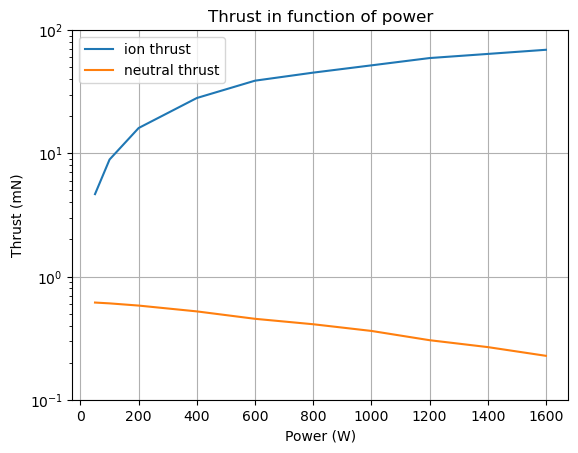

In [82]:
L_mili_ion = [v*1000 for v in L_thrust_ion]
L_mili_neutral = [v*1000 for v in L_thrust_neutral]
plt.plot(power_list, L_mili_ion, label = "ion thrust")
plt.plot(power_list, L_mili_neutral, label = "neutral thrust")
plt.yscale('log')
plt.ylim(0.1, 100)
plt.ylabel("Thrust (mN)")
plt.xlabel("Power (W)")
plt.title("Thrust in function of power")
plt.legend()
plt.grid()

In [83]:
print(LTXe)
print(LTe)

[0.03246425483657431, 0.0344667430725356, 0.037355293698867295, 0.04094723316193508, 0.042858155278444394, 0.04343416725016788, 0.043616418069523086, 0.0433046758774616, 0.042826392909019094, 0.042060170564711355]
[2.4962381378966, 2.5425046395902164, 2.6200995819088497, 2.756444303114745, 2.8919048377206398, 2.981986124604365, 3.0887496759027004, 3.235631211975242, 3.347167984060868, 3.4938284155099164]


ValueError: x and y must have same first dimension, but have shapes (10,) and (3,)

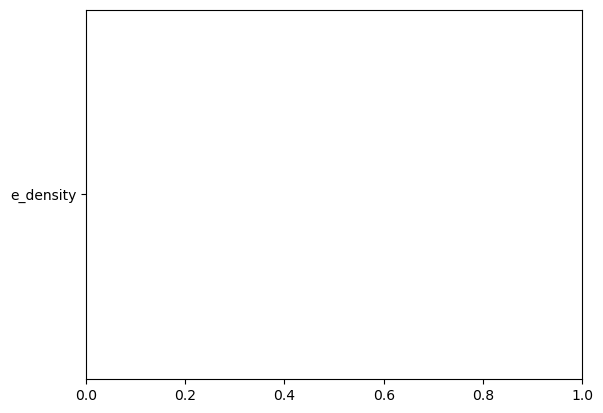

In [84]:
plot_variables(['e_density','Xe_density', 'Xe+_density'], [])
plot_variables(['e_density'], ['Xe_density'])
plot_variables(['dy_e_density'], ['dy_Xe_density', 'dy_Xe+_density'])
plot_variables(['Xe+_density'],[])
plot_variables(['e_density'],[])

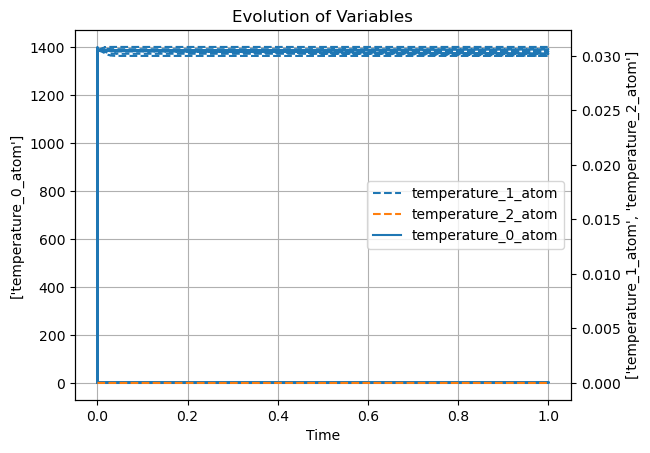

C:\Users\verdi\AppData\Local\Temp\ipykernel_20032\1856211196.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend(loc='best')


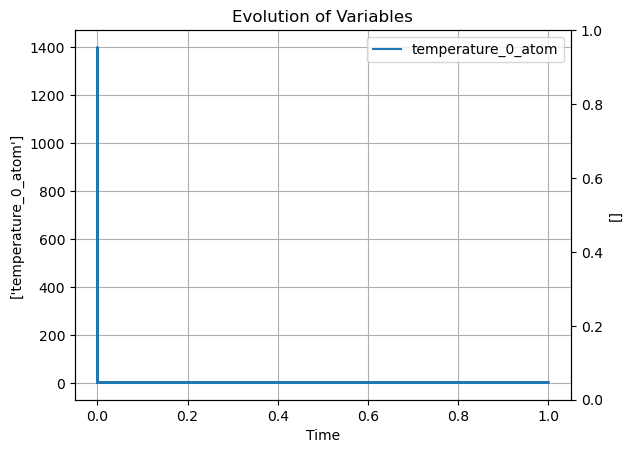

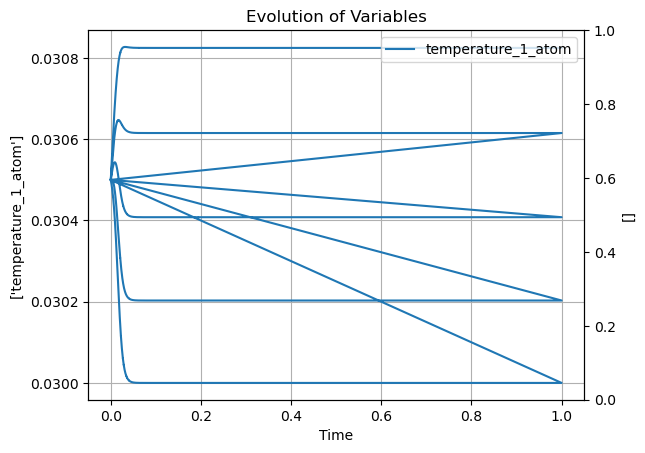

In [ ]:
plot_variables(["temperature_0_atom"], ["temperature_1_atom", "temperature_2_atom"])
#plot_variables(["dy_temperature_0_atom"], ["dy_temperature_1_atom", "dy_temperature_2_atom"])
plot_variables(["temperature_0_atom"],[])
plot_variables(["temperature_1_atom"],[])


Asymptote horizontale à la température des électrons = 0.054 eV d'après la simu json. Donc cohérent avec valeur théorique.

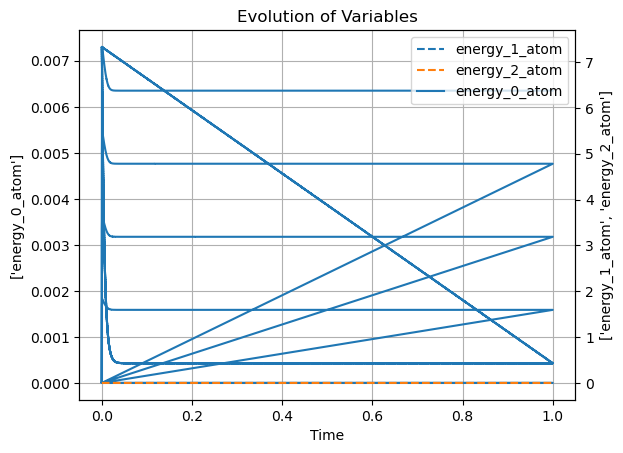

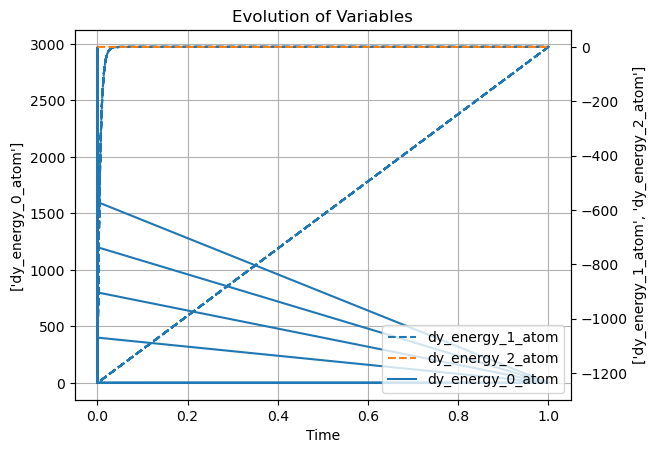

In [ ]:
plot_variables(['energy_0_atom'], ['energy_1_atom', 'energy_2_atom'])
plot_variables(['dy_energy_0_atom'], ['dy_energy_1_atom', 'dy_energy_2_atom'])

C:\Users\verdi\AppData\Local\Temp\ipykernel_20032\1856211196.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend(loc='best')


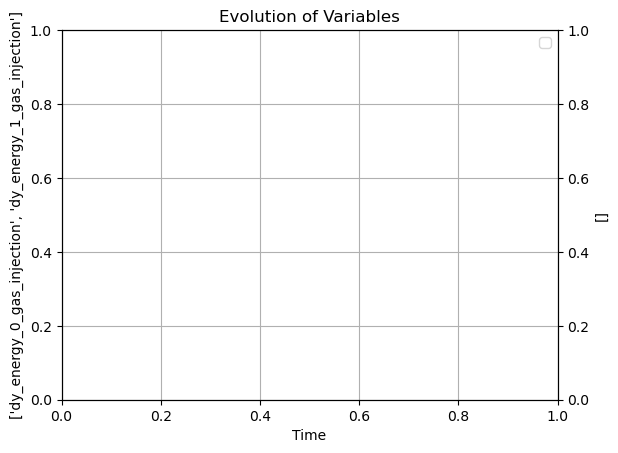

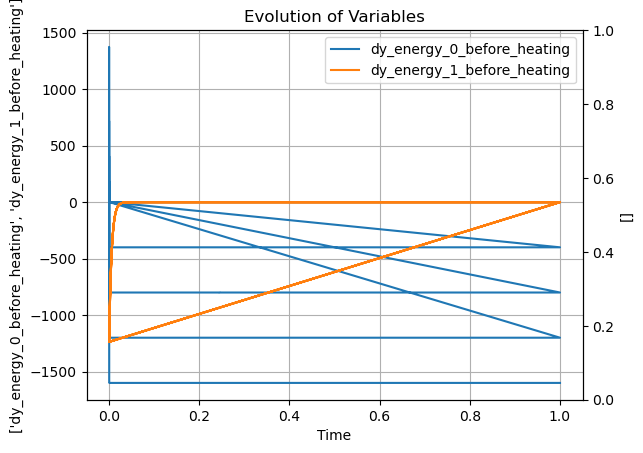

In [ ]:
plot_variables(['dy_energy_0_gas_injection', 'dy_energy_1_gas_injection'], [])
plot_variables(['dy_energy_0_before_heating', 'dy_energy_1_before_heating'], [])

C:\Users\verdi\AppData\Local\Temp\ipykernel_20032\1856211196.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend(loc='best')


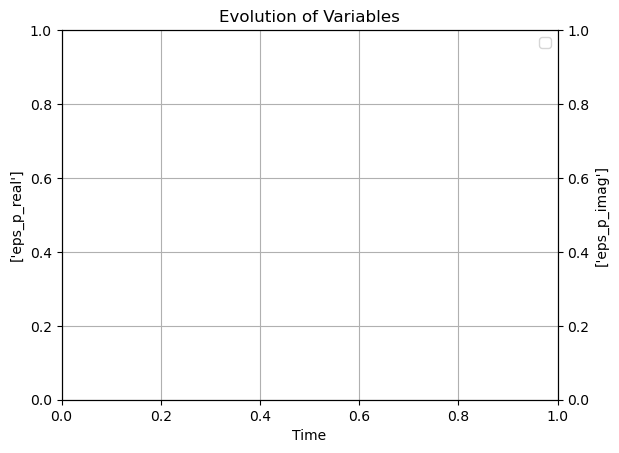

In [ ]:
plot_variables(["eps_p_real"], ["eps_p_imag"])

C:\Users\verdi\AppData\Local\Temp\ipykernel_20032\1856211196.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend(loc='best')


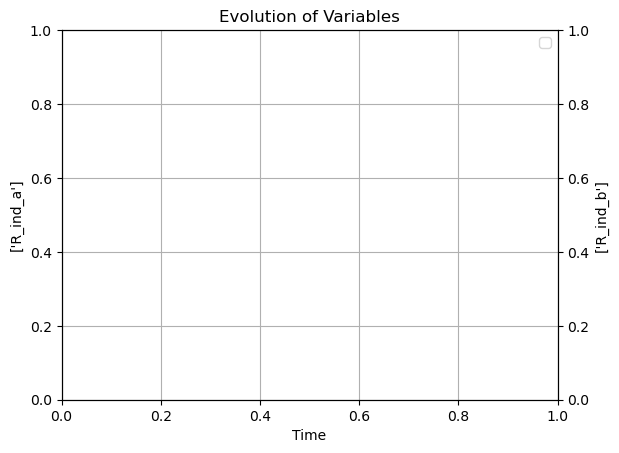

In [ ]:
plot_variables(["R_ind_a"], ["R_ind_b"])

C:\Users\verdi\AppData\Local\Temp\ipykernel_20032\1856211196.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend(loc='best')


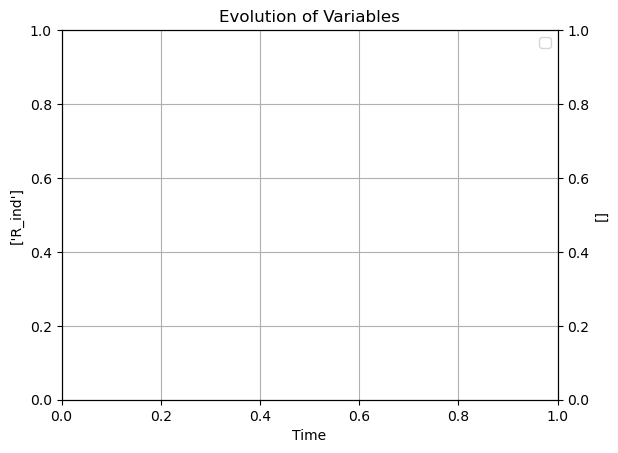

In [ ]:
plot_variables(["R_ind"], [])